# Part I - Bike Sharing Data Exploration
## by Benjamin KENETHA

## Introduction 

Le jeu de données que nous analyserons est celui du système **Ford GoBike**; cet ensemble de données comprend des informations sur les trajets individuels effectués dans un système de partage de vélos couvrant la grande région de la baie de San Francisco. Ces données s'étendent sur un mois entier (février 2019).


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


### What is the structure of your dataset?

Notre jeu de données à l'origine contient 183 412 observations pour 16 colonnes.

### What is/are the main feature(s) of interest in your dataset?

Pour ce jeu de données nous serons intéressés par la **durée du trajet** d'un emprunteur et l'**heure** où l'emprunt de la bicyclette est effectué. Puisque cette dernière information n'est pas disponible directement dans le jeu de données, nous le prétraiterons afin d'avoir cette information. Connaître comment varient l'heure à laquelle un emprunt de vého est effectué ainsi que sa durée peuvent par exemple permettre à une station de connaître la quantité de vélos à prévoir à certaines heures, certains jours, etc. pour ne pas être à court ou débordé à cause de l'affluence, ou en contrepartie avoir trop de vélos à un moment alors que certains vélos peuvent être utiles à une autre station.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Il sera intéressant de voir comment la durée du trajet et l'heure correspondant à l'emprunt varient en fonction du **jour de la semaine**, **le jour du mois** correspondant à l'emprunt, le **genre de l'emprunteur**, son **âge** et le **type d'utilisateur qu'il est**.

## Univariate Exploration

Avant de passer à l'exploration à proprement parler, nous allons **nettoyer notre jeu de données et créer d'autres variables pour mieux mener notre analyse**. 

Commençons par supprimer les colonnes qui ne présentent pas d'intérêt pour notre analyse.

In [4]:
df_clean = df.copy()
df_clean.drop(columns=['end_time', 
                 'start_station_name',
                 'start_station_id', 
                 'start_station_latitude', 
                 'start_station_longitude', 
                 'end_station_id', 
                 'end_station_name',
                 'end_station_latitude',
                 'bike_id',
                 'bike_share_for_all_trip',
                 'end_station_longitude'],
       inplace=True)

In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 5 columns):
duration_sec         183412 non-null int64
start_time           183412 non-null object
user_type            183412 non-null object
member_birth_year    175147 non-null float64
member_gender        175147 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 7.0+ MB


Nous allons remplacer les valeurs manquantes de la colonne *member_birth_year* par `0`. Nous allons ensuite mettre la colonne *start_time* et *member_birth_year* au format *datetime* et *int* respectivement.

In [6]:
df_clean.start_time = df_clean.start_time.astype('datetime64[ns]')
df_clean.member_birth_year = df_clean.member_birth_year.fillna(0).astype(int)

print(df_clean.start_time.dtype)
print(df_clean.member_birth_year.dtype)

datetime64[ns]
int64


Nous allons maintenant créer trois autres colonnes à partir de la colonne *start_time* : le jour du mois, le jour de la semaine et l'heure correspondant au moment de l'emprunt de la bicyclette. Ensuite nous supprimerons la colonne *start_time* :

In [7]:
d = {0:"lundi", 1:"mardi", 2:"mercredi", 3:"jeudi", 4:"vendredi", 5:"samedi", 6:"dimanche"}

df_clean['day_of_week'] = df_clean['start_time'].map(lambda x: d[x.weekday()])
df_clean['starting_hour'] = df_clean['start_time'].map(lambda x: x.hour)
df_clean['day_of_month'] = df_clean['start_time'].map(lambda x: x.day)

In [8]:
df_clean.drop(columns='start_time', inplace=True)

Nous allons considérer que le jour de la semaine correspondant à l'emprunt est une donnée qualitative ordinale en ce sens que lundi vient avant mardi, qui vient avant mercredi... Et aussi on peut tout à fait supposer que les données sur un jour ont une influence sur le suivant. Nous allons donc mettre cette colonne au format approprié :

In [9]:
days = ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']
day_classes = pd.api.types.CategoricalDtype(ordered=True, categories=days)
df_clean.day_of_week = df_clean.day_of_week.astype(day_classes)

In [10]:
df_clean.day_of_week.dtype

CategoricalDtype(categories=['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi',
                  'dimanche'],
                 ordered=True)

Dans notre analyse, nous serons beaucoup plus intéressés par l'âge de l'individu que par son année de naissance; nous allons donc transformer les années de naissance en âge, sachant que les données datent de 2019, puis nous renommerons la colonne en `member_age` :

In [11]:
df_clean['member_birth_year'] = df_clean['member_birth_year'].map(lambda x: 2019-x)
df_clean.rename(columns={'member_birth_year': 'member_age'}, inplace=True)

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 7 columns):
duration_sec     183412 non-null int64
user_type        183412 non-null object
member_age       183412 non-null int64
member_gender    175147 non-null object
day_of_week      183412 non-null category
starting_hour    183412 non-null int64
day_of_month     183412 non-null int64
dtypes: category(1), int64(4), object(2)
memory usage: 8.6+ MB


Y a-t-il des valeurs aberrantes dans les variables numériques de notre jeu de données ?

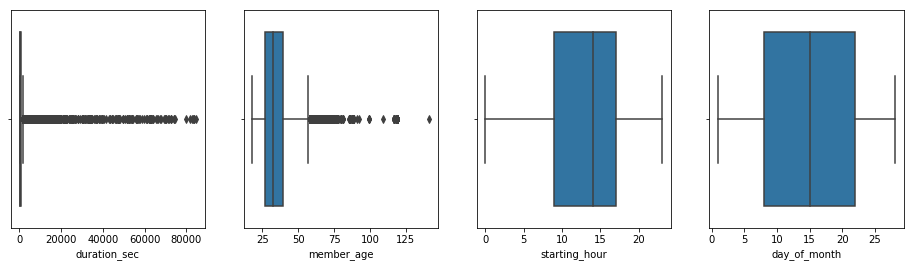

In [13]:
plt.figure(figsize=[16, 4])
tmp = df_clean.query('member_age != 2019')
plt.subplot(1, 4, 1)
sb.boxplot(data=tmp, x='duration_sec')
plt.subplot(1, 4, 2)
sb.boxplot(data=tmp, x='member_age')
plt.subplot(1, 4, 3)
sb.boxplot(data=tmp, x='starting_hour')
plt.subplot(1, 4, 4)
sb.boxplot(data=tmp, x='day_of_month')
plt.show();

Comme nous pouvons le voir, les colonnes *duration_sec* et *member_age* ont des valeurs aberrantes; regardons de plus près la distribution de ces deux colonnes :

In [14]:
df_clean.describe()[['duration_sec', 'member_age']]

,duration_sec,member_age
count,183412.000000,183412.000000
mean,726.078435,123.633868
std,1794.389780,411.850439
min,61.000000,18.000000
25%,325.000000,27.000000
50%,514.000000,32.000000
75%,796.000000,40.000000
max,85444.000000,2019.000000


La règle de l'IQR nous autorise à ne conserver que les données pour lesquelles la durée et l'âge sont inférieures ou égales à 1503 et 59 respectivement. Mais nous étendrons les limites à **2000 secondes** et **90 ans**; ceci nous permettra de conserver environ 93% des données de départ.

In [15]:
df_clean = df_clean.query('duration_sec <= 2000 and member_age <= 90')
df_clean.index = range(len(df_clean))
# Pourcentage de données initiales conservées
100*len(df_clean)/len(df)

92.88650688068392

Bien, nous pouvons commencer l'exploration univariée.

### duration_sec 

Quelle est la durée à vélo la plupart du temps ?

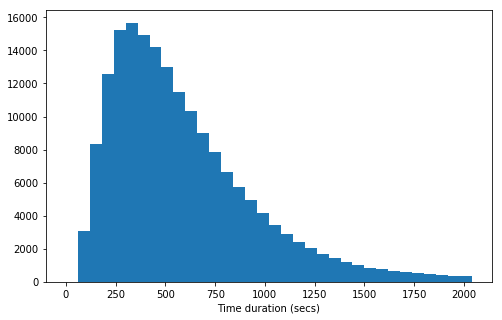

In [16]:
bins = np.arange(0, df_clean['duration_sec'].max()+60, 60)
plt.figure(figsize=[8, 5])
plt.hist(data=df, x='duration_sec', bins=bins)
plt.xlabel('Time duration (secs)')
plt.show();

Comme nous pouvons le voir nous avons une distribution inclinée à droite; la majorité des trajets durent entre **5 et 6 minutes**.

### member_age

Quelle est la catégorie d'âge de ceux qui empruntent le plus de bicyclettes ?

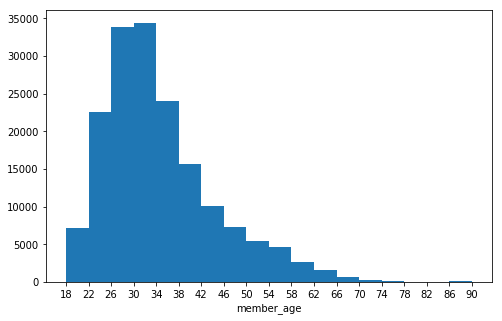

In [17]:
base_color = sb.color_palette()[0]

plt.figure(figsize=(8,5))
bins = np.arange(df_clean.member_age.min(), df_clean.member_age.max()+4, 4)
plt.hist(data=df_clean, x='member_age', bins=bins, color=base_color)
locs = np.arange(df_clean.member_age.min(), 94, 4)
plt.xlabel("member_age")
plt.xticks(locs, locs)
plt.show();

Les personnes de **26 à 34 ans** sont celles qui font le plus d'emprunts. Mais de façon plus large, le plus gros du marché est constitué des personnes de 22 à 38 ans.

### member_gender

La majorité des trajets sont-ils effectués par les hommes ou les femmes ?

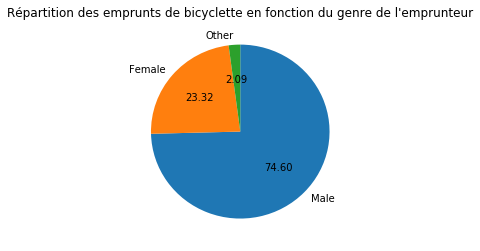

In [18]:
freq_gender = df.member_gender.value_counts()
plt.figure(figsize=[4, 4])
plt.pie(freq_gender, labels = freq_gender.index, startangle = 90, counterclock = False, autopct='%.2f')
plt.title("Répartition des emprunts de bicyclette en fonction du genre de l'emprunteur")
plt.show();

Près de **trois quarts** des trajets recensés sont effectués par des hommes !

### user_type

Quel pourcentage des trajets recensés est effectué par les utilisateurs de type Subscriber ?

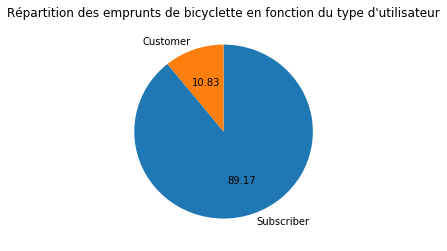

In [19]:
freq_user_type = df.user_type.value_counts()
plt.figure(figsize=[4, 4])
plt.pie(freq_user_type, labels = freq_user_type.index, startangle = 90, counterclock = False, autopct='%.2f')
plt.title("Répartition des emprunts de bicyclette en fonction du type d'utilisateur")
plt.show();

89.17% des trajets effectués sont faits par des utilisateurs Subscriber, contre 10.83% par des Customer.

### starting_hour

Y a-t-il une ou des périodes de la journée où l'affluence pour l'emprunt est plus importante ?

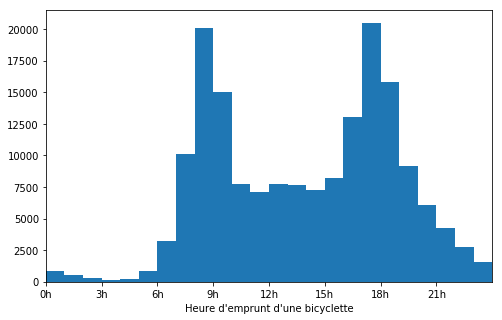

In [20]:
plt.figure(figsize=[8, 5])
bins = np.arange(0, 25, 1)
plt.hist(data=df_clean, x='starting_hour', bins=bins)
plt.xlabel("Heure d'emprunt d'une bicyclette")
locs = np.arange(0, 24, 3)
plt.xticks(locs, [str(loc)+"h" for loc in locs]);
plt.xlim(0, 24)
plt.show();

Nous avons une distribution bimodale, avec les périodes **8h-9h** et **17h-18h** qui connaissent le plus d'affluence. Entre ces deux périodes l'affluence est plutôt constante.

### day_of_week

Y a-t-il un jour, des jours ou une période de la semaine où les gens empruntent le plus les bicyclettes ?

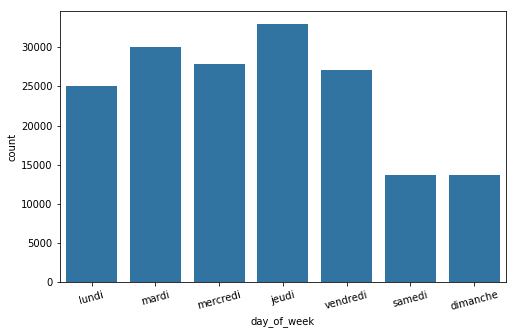

In [21]:
plt.figure(figsize=[8, 5])
sb.countplot(data=df_clean, x='day_of_week', color=base_color)
plt.xticks(rotation=15)
plt.show();

Les affluences les plus importantes sont observées en semaine, avec le plus d'affluence le jeudi; le week-end, on note une baisse drastique de la demande.

### day_of_month

On sait déjà que sur une semaine, les périodes creuses sont observées le week-end; mais y a-t-il un jour, des jours ou une période du mois où les gens ont le plus emprunté les bicyclettes ?

In [22]:
week_ends = [2, 3, 9, 10, 16, 17, 23, 24]
tmp = df_clean.query(f'day_of_month in {week_ends}')
new_row = {"duration_sec user_type": np.nan, "member_age": np.nan, "member_gender": np.nan, "day_of_week": np.nan, "starting_hour": np.nan, "day_of_month": 0}
for day in range(1, 29):
    if day in week_ends:
        continue
    new_row['day_of_month'] = day
    tmp = tmp.append(new_row, ignore_index=True)
tmp.day_of_month = tmp.day_of_month.astype(int)

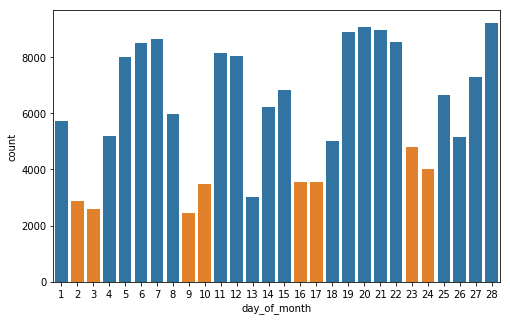

In [23]:
plt.figure(figsize=[8,5])

sb.countplot(data=df_clean, x='day_of_month', color=base_color)

sb.countplot(data=tmp, x='day_of_month', color=sb.color_palette()[1])
#plt.legend(loc="upper left")

plt.show();

Comme on peut le voir les jours de semaine (en bleu) ont généralement plus d'emprunts de bicyclettes que les week-ends (en orange).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

La variable *duration_sec* a une distribution inclinée à droite, avec la plupart des trajets faisant entre 5 et 6 minutes. 75% des trajets initiaux ont une durée inférieure ou égale à 796 secondes, mais il y en a qui vont jusqu'à plus de 80 000 secondes ! Nous avons donc dû supprimer des valeurs jugées aberrantes et nous avons conservé les trajets ayant une durée maximale de 2000 secondes.

La variable *starting_hour* a quant à elle une distribution bimodale : les deux pics d'affluence sont observés sur les plages 8h-9h et 17h-18h. Entre les deux l'affluence est plutôt constante.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Dans un premier temps nous avons supprimé les variables que nous avons jugées non-pertinentes pour notre étude.

Nous avons également détecté des valeurs aberrantes par rapport à l'âge des emprunteurs de vélo. 75% des trajets initiaux ont été effectués par des personnes ayant au plus 40 ans mais nous avons également beaucoup de centenaires; voilà pourquoi nous avons limité notre étude aux trajets dont les âges des emprunteurs sont au plus à 90 ans.

Il a aussi été question d'utiliser la variable initiale *start_time* pour créer d'autres variables qui nous permettront de mener une étude plus intéressante : *starting_hour* (heure de l'emprunt), *day_of_week* (jour de la semaine) et *day_of_month* (jour du mois); ensuite nous avons supprimé la variable *start_time*.

## Bivariate Exploration

In [24]:
numeric_vars = ['duration_sec', 'member_age', 'starting_hour']
categoric_vars = ['member_gender', 'user_type', 'day_of_week']

Tout d'abord, comment la durée du trajet, qui constitue notre première variable d'intérêt, varie en fonction de l'heure à laquelle la bicyclette a été empruntée et de l'âge de l'emprunteur ?

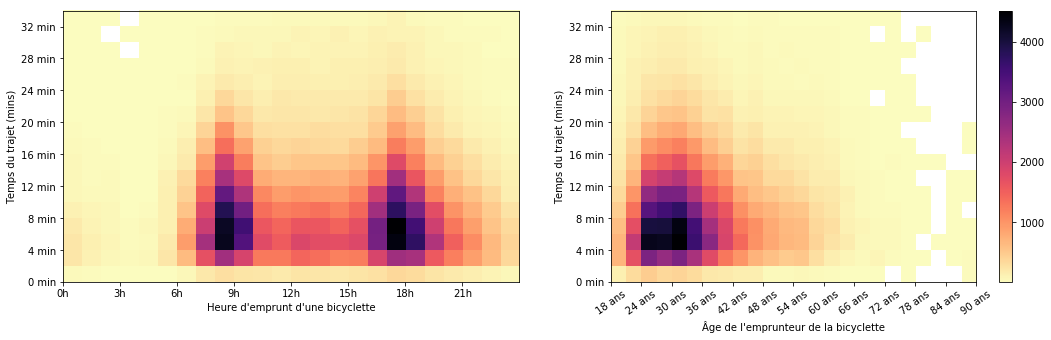

In [25]:
plt.figure(figsize=[18, 5])

plt.subplot(1, 2, 1)
x_bins = np.arange(0, 25, 1)
y_bins = np.arange(0, df_clean.duration_sec.max()+120, 120)
hist = plt.hist2d(data=df_clean, x='starting_hour', y='duration_sec', bins=[x_bins, y_bins], cmin=0.5, cmap='magma_r')
plt.xlabel("Heure d'emprunt d'une bicyclette")
plt.ylabel('Temps du trajet (mins)')
xlocs = np.arange(0, 24, 3)
ylocs = np.arange(0, 2160, 240)
plt.xticks(xlocs, [str(loc)+"h" for loc in xlocs])
plt.yticks(ylocs, [str(loc//60)+" min" for loc in ylocs])

plt.subplot(1, 2, 2)
x_bins = np.arange(df_clean.member_age.min(), df_clean.member_age.max()+3, 3)
y_bins = np.arange(0, df_clean.duration_sec.max()+120, 120)
plt.hist2d(data=df_clean, x='member_age', y='duration_sec', bins=[x_bins, y_bins], cmin=0.5, cmap='magma_r')
plt.colorbar()
plt.xlabel("Âge de l'emprunteur de la bicyclette")
plt.ylabel('Temps du trajet (mins)')
xlocs = np.arange(18, 93, 6)
ylocs = np.arange(0, 2160, 240)
plt.xticks(xlocs, [str(loc)+" ans" for loc in xlocs], rotation=35)
plt.yticks(ylocs, [str(loc//60)+" min" for loc in ylocs])

plt.show();

Les plus longs trajets à vélo (plus de 20 minutes) sont recensés essentiellement dans l'intervalle 7h-21h; mais c'est véritablement aux périodes d'affluence que nous identifiées (8h-9h et 17h-18h) que certains trajets tendent à être beaucoup plus long. 

Les plus longs trajets (plus de 20 minutes) sont essentiellement effectués par des personnes de 21 à 42 ans. On remarque également que plus l'âge est avancé, moins l'emprunteur a tendance à prolonger son temps à vélo. Par exemple les trajets effectués par les personnes de plus de 63 ans font rarement plus de 12 minutes.

Maintenant quelle est l'influence que les variables catégorielles peuvent avoir sur la durée d'un trajet ?


In [26]:
#diamonds_samp = diamonds.sample(n=2000, replace = False)

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)
    
def violingrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.violinplot(x=x, y=y, color=default_color)

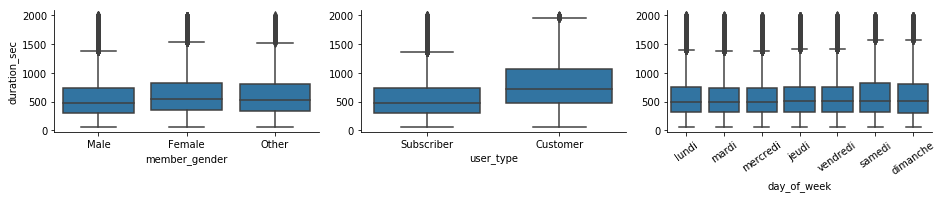

In [27]:
plt.figure(figsize = [20, 5])
g = sb.PairGrid(data = df_clean, y_vars = ['duration_sec'], x_vars = categoric_vars, aspect = 1.75)
g.map(boxgrid)
plt.xticks(rotation=35)
plt.show();

Intéressant... Faisons également des diagrammes en violon pour avoir une réponse complète à notre question :

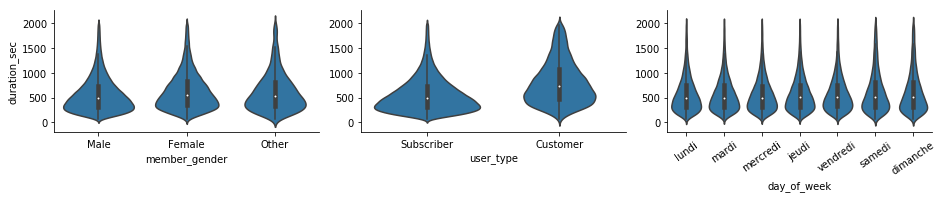

In [28]:
plt.figure(figsize = [20, 5])
g = sb.PairGrid(data = df_clean, y_vars = ['duration_sec'], x_vars = categoric_vars, aspect = 1.75)
g.map(violingrid)
plt.xticks(rotation=35)
plt.show();

Les trajets effectués par les femmes ont tendance à mettre plus de temps que ceux effectués par les hommes. 

De plus ceux effectués par les personnes de type Customer sont en généralement nettement plus longs que ceux effectués par les personnes Subscriber. Le diagramme en violon nous permet notamment de voir qu'en terme de fréquence relative, on a plus de trajets Customer qui durent plus de 1000 secondes que de trajets Subscriber. Le tableau suivant permet de confirmer cette tendance générale en comparant quartile par quartile : 

In [29]:
df_clean.groupby('user_type').describe()[['duration_sec']]

duration_sec                                                      \
                  count        mean         std   min    25%    50%     75%   
user_type                                                                     
Customer        15060.0  805.078353  426.603968  62.0  473.0  723.0  1065.0   
Subscriber     155305.0  560.064145  339.448060  61.0  308.0  482.0   730.0   

                    
               max  
user_type           
Customer    2000.0  
Subscriber  2000.0

Enfin, les temps de trajet en semaine restent relativement les mêmes mais ils se prolongent légèrement le week-end.

Quelle est la relation entre l'âge d'un emprunteur et l'heure à laquelle le vélo est emprunté ?

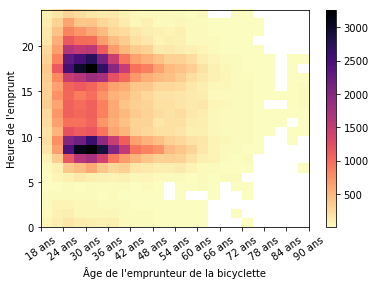

In [30]:
x_bins = np.arange(df_clean.member_age.min(), df_clean.member_age.max()+3, 3)
y_bins = np.arange(0, 25, 1)
plt.hist2d(data=df_clean, x='member_age', y='starting_hour', bins=[x_bins, y_bins], cmin=0.5, cmap='magma_r')
plt.colorbar()
plt.xlabel("Âge de l'emprunteur de la bicyclette")
plt.ylabel("Heure de l'emprunt")
xlocs = np.arange(18, 93, 6)
#ylocs = np.arange(0, 25, 1)
plt.xticks(xlocs, [str(loc)+" ans" for loc in xlocs], rotation=35)
# plt.yticks(ylocs, [str(loc//60)+" h" for loc in ylocs])

plt.show();

Jusqu'à environ 63 ans, les emprunts sont effectués quasiment à toutes les heures. Mais on remarque qu'après cet âge, les trajets se font essentiellement à partir de 5h ou 6h du matin; ce qui est normal car les personnes de cet âge ont généralement besoin de plus de repos la nuit. De plus à partir de 77 ans, aucun emprunt de bicyclette ne se fait après 18h. 

On peut donc dire que les personnes âgées ont tendance à ne pas emprunter de bicyclettes trop tôt le matin ni trop tard le soir.

Quelle est l'influence que les variables catégorielles (genre, type d'utilisateur et jour de la semaine) peuvent avoir sur l'heure d'emprunt d'une bicyclette ?

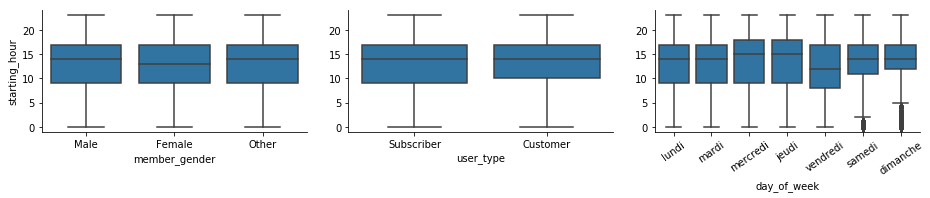

In [31]:
plt.figure(figsize = [20, 5])
g = sb.PairGrid(data = df_clean, y_vars = ['starting_hour'], x_vars = categoric_vars, aspect = 1.75)
g.map(boxgrid)
plt.xticks(rotation=35)
plt.show();

Intéressant... Faisons également des diagrammes en violon pour avoir une réponse complète à notre question :

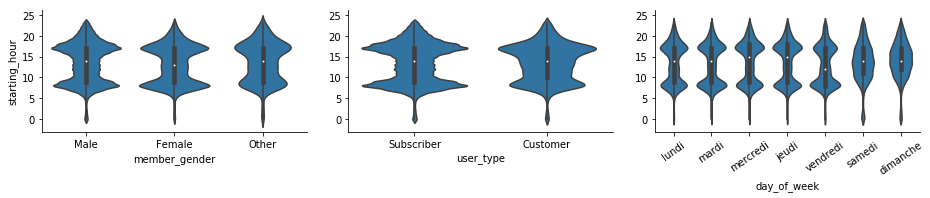

In [32]:
plt.figure(figsize = [20, 5])
g = sb.PairGrid(data = df_clean, y_vars = ['starting_hour'], x_vars = categoric_vars, aspect = 1.75)
g.map(violingrid)
plt.xticks(rotation=35)
plt.show();

Premièrement, on remarque que les hommes et les femmes ont les mêmes tendances par rapport à l'heure d'emprunt, les mêmes périodes de pic et de baisse notamment.

Deuxièmement, les deux types d'utilisateur ont également les mêmes périodes de pic; à la différence qu'après le premier pic l'affluence des Subscribers est constante avant de remonter brusquement au deuxième pic, alors que celle des Customers croît progressivement jusqu'à la deuxième période d'affluence.

Enfin, en semaine l'heure d'emprunt croit progressivement jusqu'à jeudi, avant de décroitre vendredi, où à midi la moitié des emprunts de la journée ont déjà été effectués, au lieu de 14h ou 15h pour les précédents jours. La situation est différente le week-end. Les gens n'ont pas tendance à emprunter tôt le matin surtout le dimanche; en témoignent les quelques points aberrants qu'on voit ces jours. Autre remarque : ces deux jours on n'observe pas les périodes de pics à 8h et 17h comme en semaine. L'affluence croît progressivement de 6h à 14h environ avant de décroître de la même façon jusque dans la nuit.

La répartition des trajets effectués par les hommes ou les femmes varie-t-elle en fonction des jours de la semaine ?

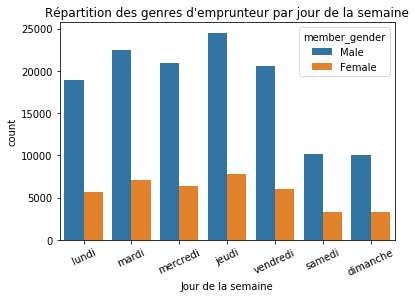

In [33]:
plt.figure()
sb.countplot(data=df_clean.query('member_gender != "Other"'), x='day_of_week', hue='member_gender')
plt.xlabel("Jour de la semaine")
plt.title("Répartition des genres d'emprunteur par jour de la semaine")
plt.xticks(rotation=25)
plt.show();

Il y a toujours beaucoup plus d'hommes que de femmes chaque jour qui empruntent des bicyclettes. Mais intéressons-nous aux ***proportions*** de trajets d'hommes et de femmes; la même tendance est-elle observée ?

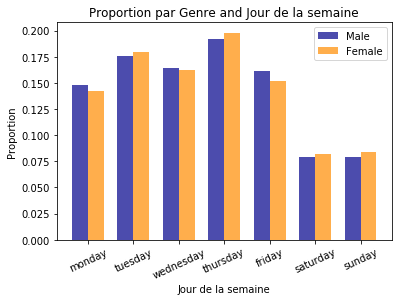

In [34]:
tmp = df_clean.query('member_gender != "Other"')

gender_count_by_days = tmp.groupby(['member_gender', 'day_of_week']).count()['user_type']
gender_totals = tmp.groupby('member_gender').count()['user_type']
props_men = gender_count_by_days['Male']/gender_totals['Male']
props_women = gender_count_by_days['Female']/gender_totals['Female']

ind = np.arange(len(props_men))  # the x locations for the groups
width = 0.35  

plt.figure()

# the width of the bars
# plot bars
men_bars = plt.bar(ind, props_men, width, color='darkblue', alpha=.7, label='Male')
women_bars = plt.bar(ind + width, props_women, width, color='darkorange', alpha=.7, label='Female')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Jour de la semaine')
plt.title('Proportion par Genre and Jour de la semaine')
locations = ind + width / 2  # xtick locations
labels = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']  # xtick labels
plt.xticks(locations, labels, rotation=25)

# legend
plt.legend()

plt.show();

Les proportions de trajets hommes et femmes sont quant à elles équilibrées chaque jour.

On va se poser les mêmes questions en ce qui concerne le type d'un utilisateur, c'est-à-dire : Comment varient les répartitions des Subcriber et Customer chaque jour de la semaine ? Qu'en est-il des proportions ?

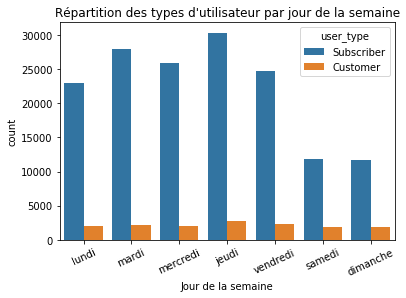

In [35]:
plt.figure()
sb.countplot(data=df_clean, x='day_of_week', hue='user_type')
plt.xticks(rotation=25)
plt.xlabel('Jour de la semaine')
plt.title("Répartition des types d'utilisateur par jour de la semaine")
plt.show();

Pour chaque jour on a plus de trajets Subscriber que de Customer; mais on remarque que le nombre de trajets pour les Customer reste pratiquement le même chaque jour, les week-ends également. Donc en réalité la baisse de régime observée pour l'affluence les jours de week-end est due uniquement à la baisse de régime des utilisateurs Subscriber. 

Que peut-on dire des proportions ?

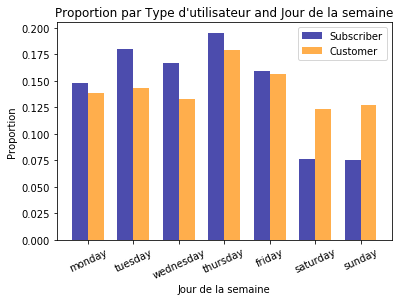

In [36]:
user_type_count_by_days = df_clean.groupby(['user_type', 'day_of_week']).count()['member_gender']
user_type_totals = df_clean.groupby('user_type').count()['member_gender']
props_subscriber = user_type_count_by_days['Subscriber']/user_type_totals['Subscriber']
props_customer = user_type_count_by_days['Customer']/user_type_totals['Customer']

ind = np.arange(len(props_subscriber))  # the x locations for the groups
width = 0.35  

plt.figure()

# the width of the bars
# plot bars
subscriber_bars = plt.bar(ind, props_subscriber, width, color='darkblue', alpha=.7, label='Subscriber')
customer_bars = plt.bar(ind + width, props_customer, width, color='darkorange', alpha=.7, label='Customer')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Jour de la semaine')
plt.title("Proportion par Type d'utilisateur and Jour de la semaine")
locations = ind + width / 2  # xtick locations
labels = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']  # xtick labels
plt.xticks(locations, labels, rotation=25)

# legend
plt.legend()

plt.show();

Bien ! Là on peut voir qu'en semaine il y a plus de Subscriber que de Customer en terme de proportions (même si c'est assez équilibré le vendredi); mais le week-end il y a beaucoup plus de Customer que de Subscriber.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- **durée du trajet** :

Les plus longs trajets à vélo (plus de 20 minutes) sont recensés essentiellement dans l'intervalle 7h-21h.

Les plus longs trajets (plus de 20 minutes) sont essentiellement effectués par des personnes de 21 à 42 ans. On remarque également que plus l'âge est avancé, moins l'emprunteur a tendance à prolonger son temps à vélo. .

Les trajets effectués par les femmes ont tendance à mettre plus de temps que ceux effectués par les hommes.

Ceux effectués par les personnes de type Customer sont en généralement nettement plus longs que ceux effectués par les personnes Subscriber. 

Enfin, les temps de trajet en semaine restent relativement les mêmes mais ils se prolongent légèrement le week-end.

- **heure d'emprunt** :

Les personnes âgées ont tendance à ne pas emprunter de bicyclettes trop tôt le matin ni trop tard le soir.

Le genre comme le type d'utilisateur n'ont pas une grande influence sur l'heure d'emprunt; les caractéristiques sont quasiment les mêmes.

Enfin, en semaine l'heure d'emprunt croit progressivement jusqu'à jeudi, avant de décroitre vendredi, où à midi la moitié des emprunts de la journée ont déjà été effectués, au lieu de 14h ou 15h pour les précédents jours. La situation est différente le week-end. Les gens n'ont pas tendance à emprunter tôt le matin surtout le dimanche. Autre remarque : ces deux jours on n'observe pas les périodes de pics à 8h et 17h comme en semaine. L'affluence croît progressivement de 6h à 14h environ avant de décroître de la même façon jusque dans la nuit.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Nous avons étudié la relation qu'il y a entre le genre d'emprunteur et le jour de la semaine où il a tendance à emprunter. Chaque jour la majorité des trajets est effectué par les hommes; mais cela semble uniquement dû au fait qu'il y a plus d'hommes qui empruntent que de femmes, vu que les proportions d'hommes et de femmes qui empruntent sont quasi pareilles chaque jour. De même, en terme de répartitions on a plus de Subscriber que de Customer chaque jour; mais en terme de proportions, on a plus d'utilisateurs Customer le week-end.

## Multivariate Exploration

Nous avons pu observer qu'en général les trajets de bicyclette féminins avaient tendance à mettre plus longs que les masculins. Peut-on faire la même observation pour chaque jour de la semaine ou alors certains jours seulement ?

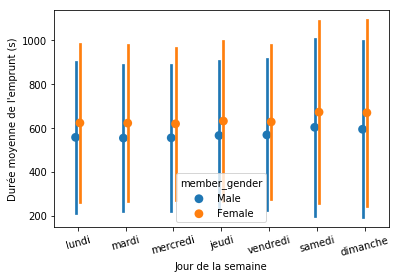

In [37]:
plt.figure()
sb.pointplot(data=df_clean.query('member_gender != "Other"'), x='day_of_week', y='duration_sec', hue='member_gender', dodge=0.09, ci='sd', linestyles="") #or dodge=True
plt.xticks(rotation=15)
plt.xlabel('Jour de la semaine')
plt.ylabel("Durée moyenne de l'emprunt (s)")
plt.show();

Effectivement, la même observation que précédemment est faite pour chaque jour de la semaine; on note également pour les trajets masculins comme pour les trajets féminins une augmentation de la durée les jours de week-end.

Qu'en est-il de la variation du temps de trajet par jour de semaine et par genre d'utilisateur ?

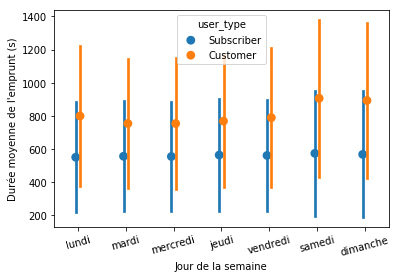

In [38]:
plt.figure()
sb.pointplot(data=df_clean, x='day_of_week', y='duration_sec', hue='user_type', dodge=0.09, ci='sd', linestyles="") #or dodge=True
plt.xticks(rotation=15)
plt.xlabel('Jour de la semaine')
plt.ylabel("Durée moyenne de l'emprunt (s)")
plt.show();

Comme précédemment, chaque jour de la semaine les trajets effectués par les utilisateurs de type Customer sont en général beaucoup plus longs que ceux effectués par les utilisateurs Subscriber. 

Mais on note un détail très intéressant : alors que le week-end la moyenne de durée des Customer augmente, celle des Subscriber reste constante ! Donc l'augmentation générale des temps de trajets le week-end constatée lors de l'exploration bivariée serait due uniquement à l'augmentation des temps des utilisateurs Customer.

Enfin, quelle est la relation entre la durée d'un trajet et les trois variables suivantes : l'heure d'emprunt, le genre et le type d'un utilisateur ?

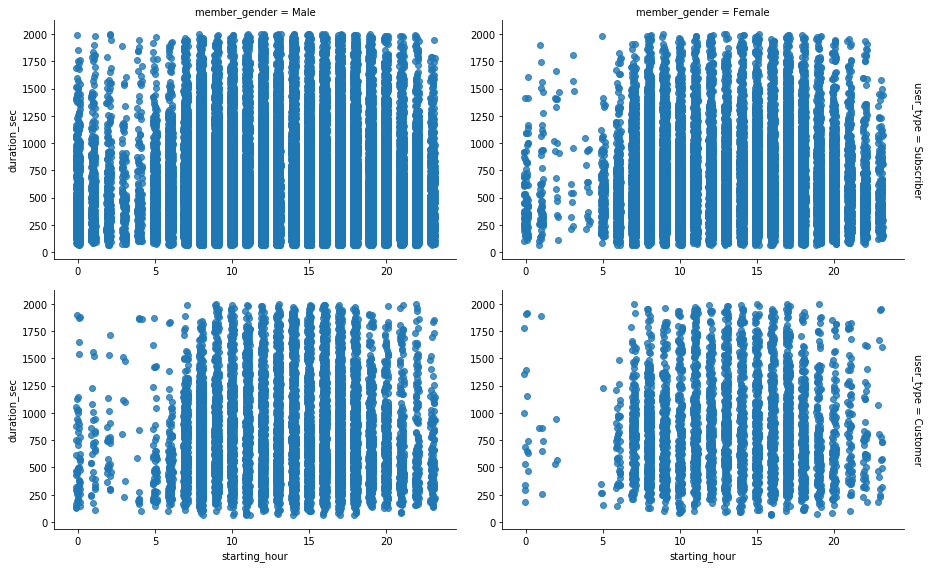

In [39]:
plt.figure()
g = sb.FacetGrid(data=df_clean.query('member_gender != "Other"'), col='member_gender', row='user_type', size=4, aspect=1.6, margin_titles=True)
g.map(sb.regplot, 'starting_hour', 'duration_sec', x_jitter=0.15, fit_reg=False) 
plt.show();

Quelque chose qu'on peut dire déjà c'est que pour chaque type d'utilisateur, les heures plus matinales (1h - 5h) et les heures les plus tardives (21h - minuit) sont occupées essentiellement par les trajets masculins. Mais de 6h à 20h les tendances sont les mêmes dans chaque catégorie.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Il est maintenant clair que les trajets effectués par les utilisateurs Customer sont plus longs en général que ceux effectués par les utilisateurs Subscriber, et que les trajets effectués par les femmes sont en général plus longs que ceux effectués par les hommes.

### Were there any interesting or surprising interactions between features?

Il a été particulièrement intéressant et surprenant de constater que l'augmentation générale du temps de trajet à bicyclette le week-end était dû essentiellement à l'augmentation du temps de trajet d'un type d'utilisateur sur cette période : Customer. Qui pourtant ne représentent qu'environ 10% des trajets.